In [21]:
#import the dataset
import pandas as pd
df=pd.read_csv('C://Users//kajal kapasiya//Desktop//data science//dataset//krishnaik_coding//heart disease prediction//dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


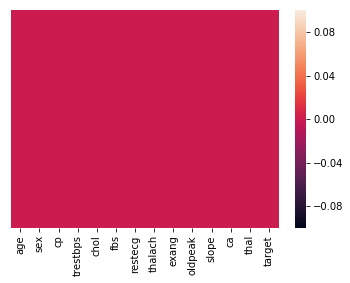

In [22]:
#see the null values column
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.isnull(),yticklabels=False)

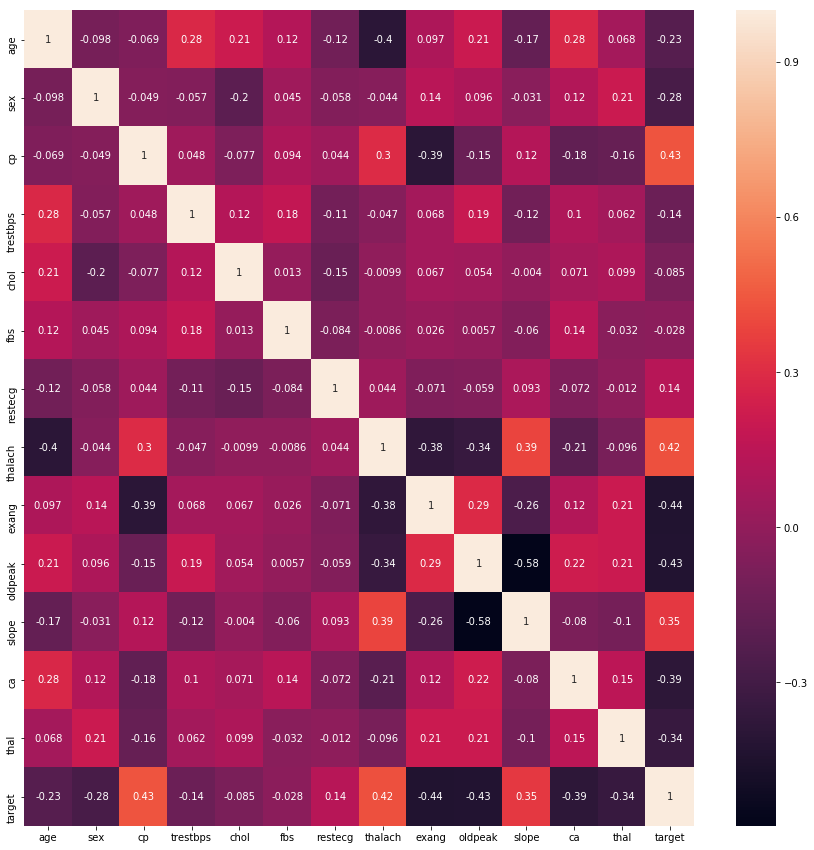

In [23]:
#plot the correlation between variables
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B690A401D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B690E1DA20>]], dtype=object)

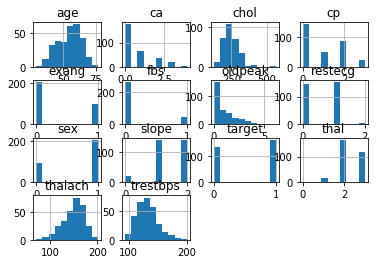

In [24]:
#plot the histogram to see the distribution of data
df.hist()

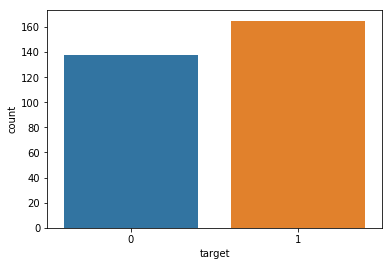

In [25]:
#see the distribution of target variable to see whether dataset is balanced or imbalanced
sns.countplot(x='target',data=df)

In [26]:
#code to get the dummies for categorical variables
df1=pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [27]:
#usage of standardscaler
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
columns_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df1[columns_to_scale]=model.fit_transform(df1[columns_to_scale])

In [28]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [29]:
#segregate x and y 
x=df1.drop('target',axis=1)
y=df1['target']

In [30]:
#code to get the right n value
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
mean_score=[]
for i in range (1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    mean_score.append(score.mean())
    
    

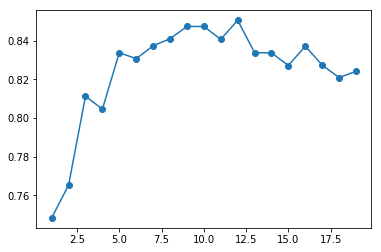

In [31]:
#plot the graph between k and mean_score to see the appropriate k value.
plt.plot(range(1,20),mean_score,marker='o')

In [32]:
#see the score for KNN for k=12
from sklearn.model_selection import cross_val_score
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,x,y,cv=10)
print(np.mean(score))

0.850663700408


In [33]:
#random forest implementation
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
score=cross_val_score(rfc,x,y,cv=10)
print(np.mean(score))


0.798390804598
